In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
Ice=pd.read_csv('C:/Users/yjzabalam/Downloads/IceCreamData.csv')

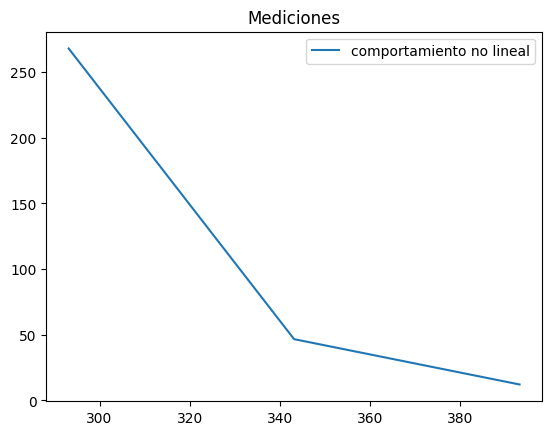

In [2]:
temperaturas = np.array([20, 70, 120])
medicion_resistencias = ([268.044,46.631,12.114])
# graficando los datos
# preprocesamiento de los datos: convertir a grados Kelvin
temperaturas_kelvin = temperaturas + 273.15
plt.plot(temperaturas_kelvin, medicion_resistencias)
plt.title("Mediciones")
plt.legend(["comportamiento no lineal"])

In [9]:
Ice.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
# creando la matriz A
A = np.ones((len(temperaturas), 3))
# ajustando la segunda columna
A[:,1] = np.log(medicion_resistencias)
# ajustando la tercera columna de la matriz A.
A[:,2] = np.power(np.log(medicion_resistencias), 3)
# ahora el vector b
b = 1 / temperaturas_kelvin
# resolviendo el sistema (calcular la regresión, es decir, los mejores parámetros A, B, C que explican los datos
# dado el modelo descrito
x = np.dot(np.linalg.pinv(A), b)

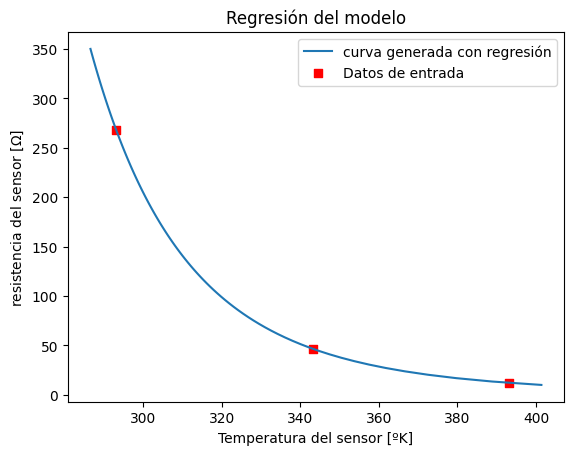

In [4]:
# Ahora generando una curva con los datos
resistencias_generadas = np.linspace(10, 350, 100) # resistencias generadas
# aplicamos la función con los coeficientes
temp_inversas = x[0] + x[1] * np.log(resistencias_generadas) + x[2] * np.power(np.log(resistencias_generadas), 3)
temperaturas_modelo = 1/ temp_inversas

plt.plot(temperaturas_modelo, resistencias_generadas)
plt.scatter(temperaturas_kelvin, medicion_resistencias, c="r", marker="s")
plt.title("Regresión del modelo")
plt.xlabel("Temperatura del sensor [ºK]")
plt.ylabel("resistencia del sensor ["r"$\Omega$]")
plt.legend(["curva generada con regresión", "Datos de entrada"])

In [33]:
Fish=pd.read_excel('C:/Users/yjzabalam/Downloads/Fish3.xlsx')


# Preprocesando el dataset, vamos a cambiar los nombres para entender mejor las longitudes medidas de los Helados
df1 = Fish.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
34,Bream,950,38,41,465,176235,63705
166,Trout,1664,225,255,308,25067,19087
50,Roach,200,221,235,268,73968,41272
74,Perch,40,138,15,16,3824,2432
23,Bream,680,318,35,406,154686,61306


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Species      200 non-null    object
 1   Weight       200 non-null    int64 
 2   VerticalLen  200 non-null    int64 
 3   DiagonalLen  200 non-null    int64 
 4   CrossLen     200 non-null    int64 
 5   Height       200 non-null    int64 
 6   Width        200 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.1+ KB


Text(0.5, 1.0, 'Correlation Matrix')

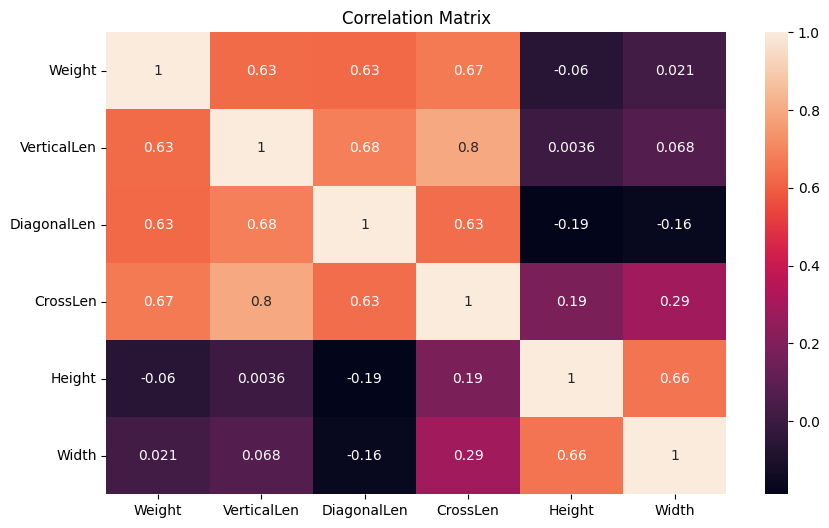

In [35]:





# y como parte de un análisis, revisaremos la correlación de las variables
df2 = df1.drop("Species", axis=1)
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df2.corr(), annot =True)
plt.title('Correlation Matrix')

In [36]:
# eliminando variables no independientes
df3 = df1.drop(["DiagonalLen", "CrossLen"], axis=1)
df3.head()

,Species,Weight,VerticalLen,Height,Width
0,Bream,242,232,1152,402
1,Bream,290,24,1248,43056
2,Bream,340,239,123778,46961
3,Bream,363,263,1273,44555
4,Bream,430,265,12444,5134


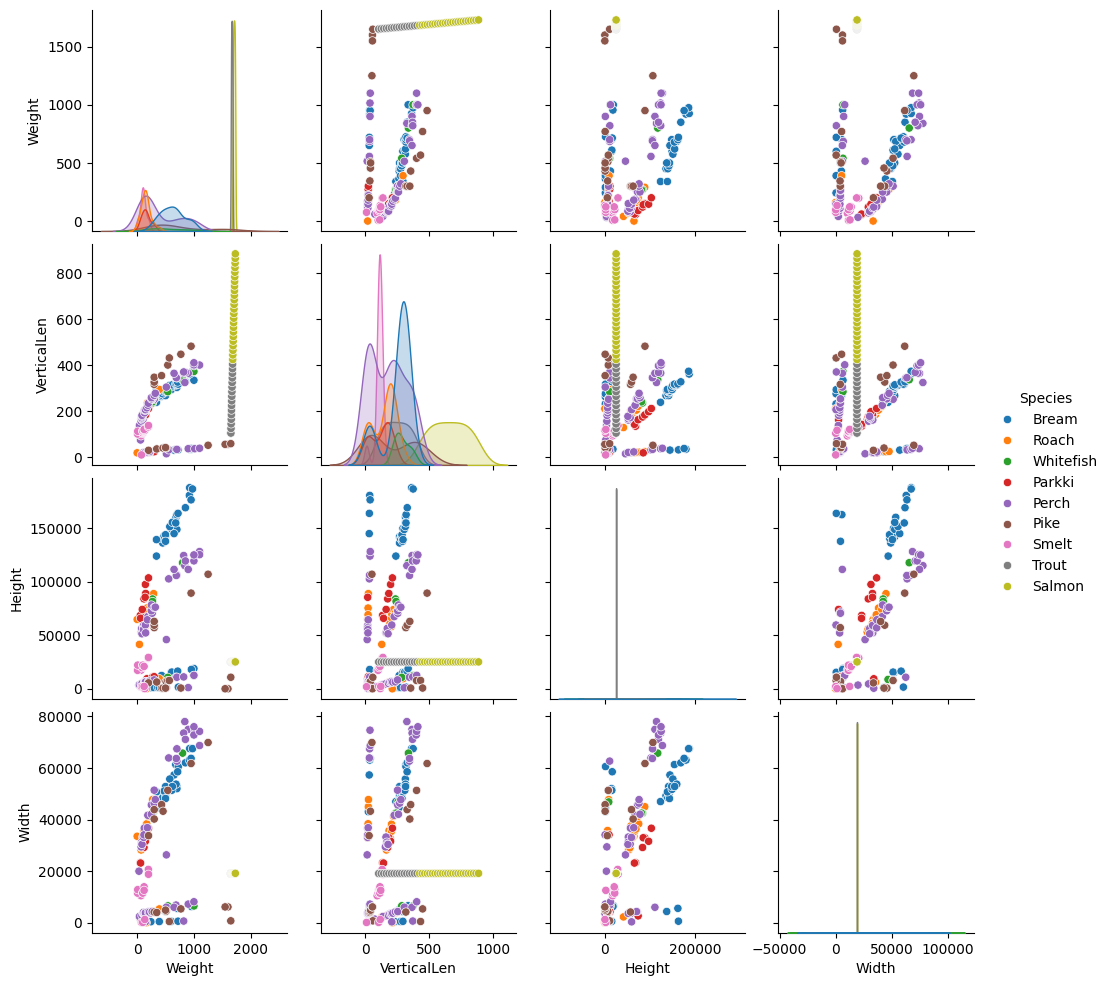

In [37]:
# visualizando los datos
sns.pairplot(df3, kind= "scatter", hue="Species")
# en el pairplot se puede apreciar que hay ciertas correlaciones entre ancho y alto. Sin embargo, entre diferentes especies hay variaciones.

In [38]:
# Preprocesando el conjunto de datos
df3.isna().sum() # revisando si hay nulos

Species        0
Weight         0
VerticalLen    0
Height         0
Width          0
dtype: int64

In [39]:
# Eliminando casos imposibles con la lógica del dataset. Por ejemplo, peces con peso o longitudes que sean cero
df3[df3["Weight"] == 0]
# se debe mostrar una tabla con los eliminados, eliminamos empleando el index

,Species,Weight,VerticalLen,Height,Width
40,Roach,0,19,64752,33516


In [40]:
df3.drop([40])

,Species,Weight,VerticalLen,Height,Width
0,Bream,242,232,1152,402
1,Bream,290,24,1248,43056
2,Bream,340,239,123778,46961
3,Bream,363,263,1273,44555
4,Bream,430,265,12444,5134
...,...,...,...,...,...
195,Salmon,1722,805,25125,19145
196,Salmon,1724,825,25127,19147
197,Salmon,1726,845,25129,19149
198,Salmon,1728,865,25131,19151


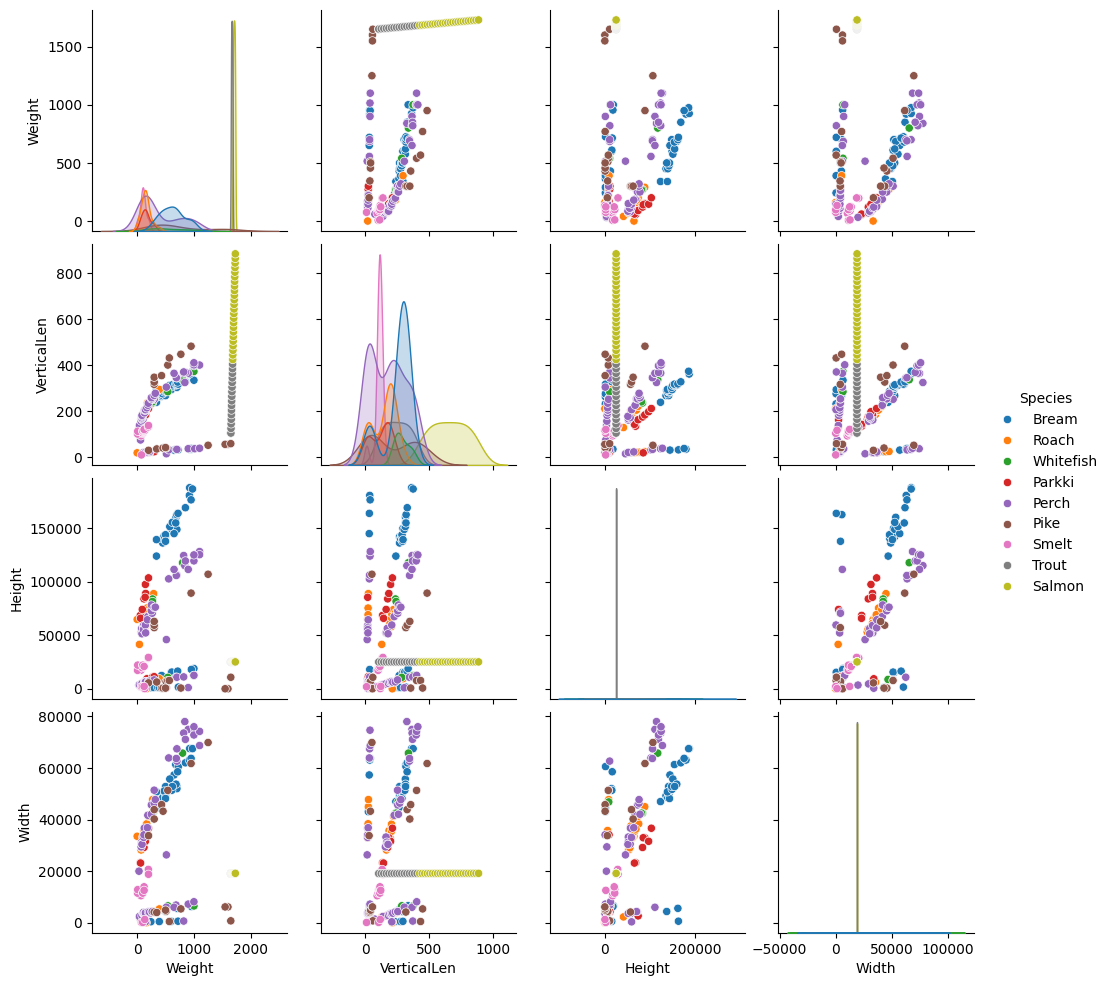

In [41]:
# visualizando los datos
sns.pairplot(df3, kind= "scatter", hue="Species")
# en el pairplot se puede apreciar que hay ciertas correlaciones entre ancho y alto. Sin embargo, entre diferentes especies hay variaciones.

In [42]:
# Preprocesando el conjunto de datos
df3.isna().sum() # revisando si hay nulos

Species        0
Weight         0
VerticalLen    0
Height         0
Width          0
dtype: int64

In [43]:
"""
ya que las especies son un valor categórico, y necesitamos números para entrenar
modelos, la mejor alternativa es realizar un "one-hot" encoding, que convierte los
nombres de especies (7 especies) en un arreglo de 1x7
donde solo se verá un uno (True) en la columna que corresponda al nombre,
en el otro caso se tendrán ceros (False).
"""
especies_codificadas = pd.get_dummies(df3.Species)
especies_codificadas.head()

,Bream,Parkki,Perch,Pike,Roach,Salmon,Smelt,Trout,Whitefish
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False


In [44]:
# luego creamos un dataframe que contenga toda la información
df4 = pd.concat([df3, especies_codificadas], axis="columns")
df4.head()
# como ya tenemos los nombres codificados, podemos deshacernos de la columna con los nombres y tambien la columna Whitefish
# que no nos sirve para el ejercicio, a Whitefish lo eliminamos porque solo hay 6 muestras, que son insuficientes para el ejercicio de entrenamiento de un modelo.
df5 = df4.drop(["Species", "Whitefish"], axis="columns")
df5.head()

,Weight,VerticalLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Salmon,Smelt,Trout
0,242,232,1152,402,True,False,False,False,False,False,False,False
1,290,24,1248,43056,True,False,False,False,False,False,False,False
2,340,239,123778,46961,True,False,False,False,False,False,False,False
3,363,263,1273,44555,True,False,False,False,False,False,False,False
4,430,265,12444,5134,True,False,False,False,False,False,False,False


In [45]:
# X tendrá los datos de entrenamiento
X = df5[["Height", "Width", "VerticalLen", "Bream", "Parkki", "Pike", "Roach", "Smelt"]]
y = df5[["Weight"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (160, 8)
Tamaño de X_test= (40, 8)
Tamaño de y_train= (160, 1)
Tamaño de y_test= (40, 1)


In [46]:
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

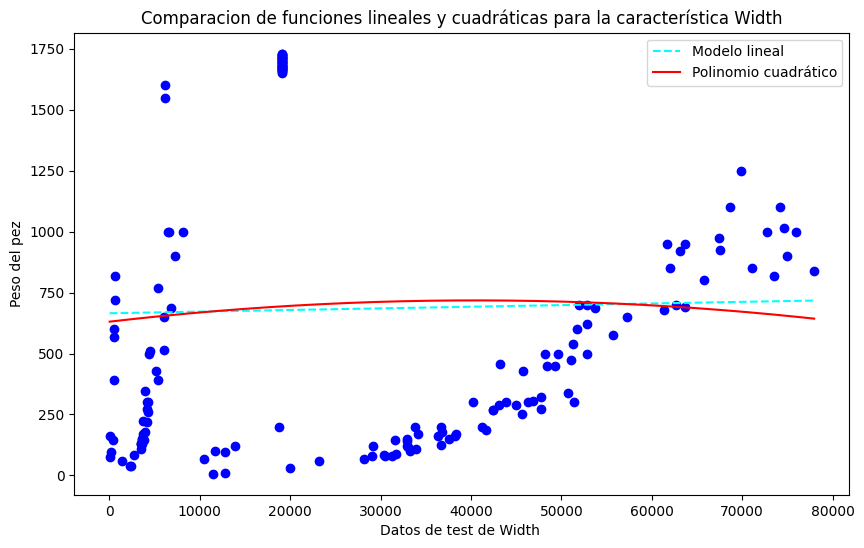

In [47]:
polynomial_plot(X_train.Width, y_train) # comparando modelos para el ancho y el peso del pez

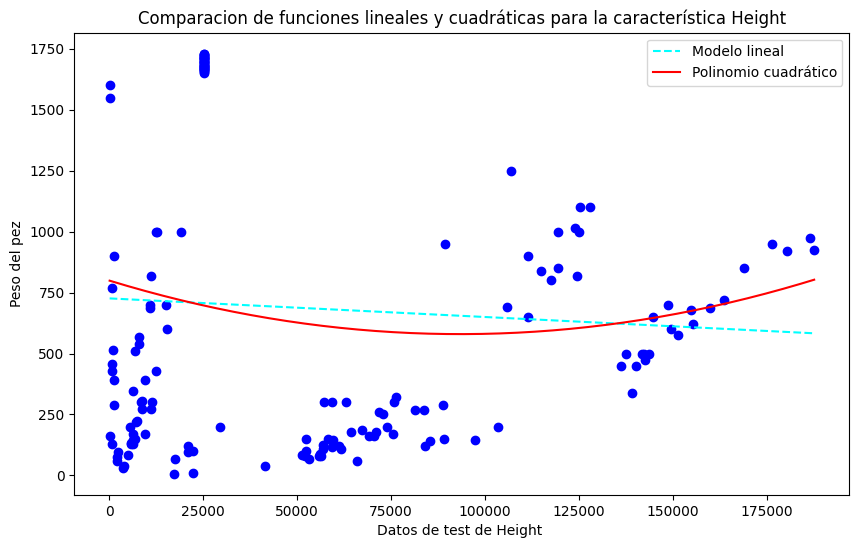

In [48]:
polynomial_plot(X_train.Height, y_train) # comparando modelos para el alto y el peso del pez

In [49]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lm = linear_model.LinearRegression()
lm.fit(X_poly, y_train)

predictions = lm.predict(poly.fit_transform(X_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))


r2_score=  0.4691073370230745


In [50]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Weight,120.000000,1690.000000,610.000000,714.000000,197.000000,265.000000,145.000000,98.000000,1658.000000,70.000000,...,363.00000,556.000000,1700.000000,110.00000,955.00000,242.000000,1650.000000,515.000000,197.000000,1656.00000
Predicted Weight,282.257106,1401.358269,478.658309,331.996961,100.446032,504.466133,158.025985,86.979247,666.196444,786.396688,...,684.80888,311.222599,1566.779706,48.72444,204.42521,758.974093,740.830628,212.870626,873.288585,609.83566


Text(0.5, 1.0, 'Comparación del peso generado por el modelo y las etiquetas')

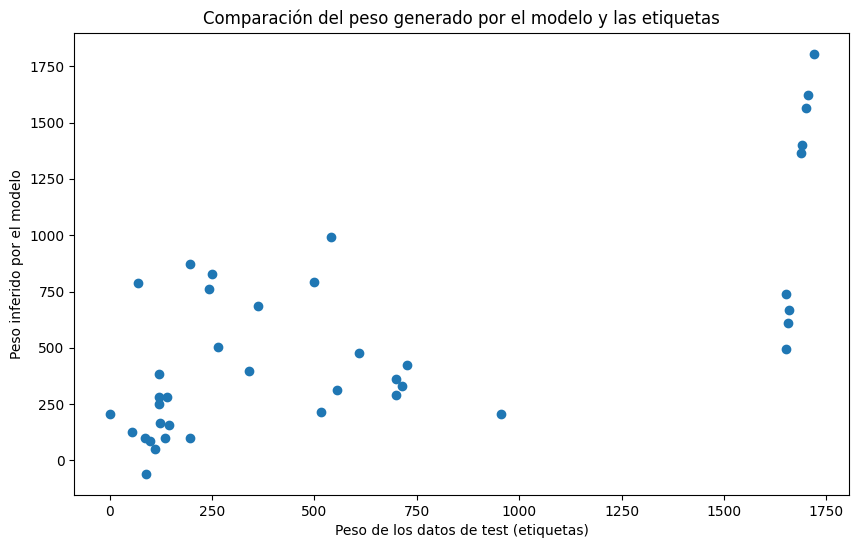

In [51]:
plt.scatter(y_test, predictions)
plt.xlabel('Peso de los datos de test (etiquetas)')
plt.ylabel('Peso inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del peso generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

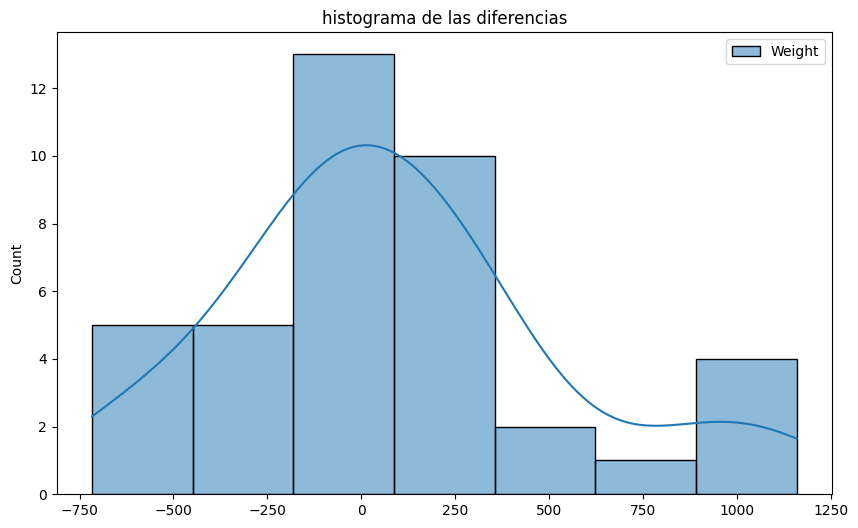

In [52]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

In [ ]:
## Tarea(3) en clase/casa:

De acuerdo a lo anterior, aplicar al mismo dataset (escogido por usted) los 4 métodos de regresión vistos hasta el momento (lineal simple, lineal múltiple, logarítmica, y polinomial). Para la tarea(2): obtener la misma gráfica de la distribución de los "residuals" para cada uno de los 4 modelos.

In [55]:
from sklearn.linear_model import LinearRegression
# Supongamos que queremos predecir 'y' basado en 'x'
X = df4[['Weight']]
y = df4['Height']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Creamos los modelos
lin_reg = LinearRegression()
poly_reg = PolynomialFeatures(degree=2)
log_reg = LinearRegression()

# Entrenamos los modelos
lin_reg.fit(X_train, y_train)

# Para la regresión polinomial, primero transformamos los datos y luego los ajustamos
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
poly_lin_reg = LinearRegression().fit(X_poly_train, y_train)

log_reg.fit(np.log1p(X_train), np.log1p(y_train))

# Hacemos las predicciones
lin_pred = lin_reg.predict(X_test)
poly_pred = poly_lin_reg.predict(X_poly_test)  # Usamos el modelo de regresión lineal con los datos transformados
log_pred = np.expm1(log_reg.predict(np.log1p(X_test)))


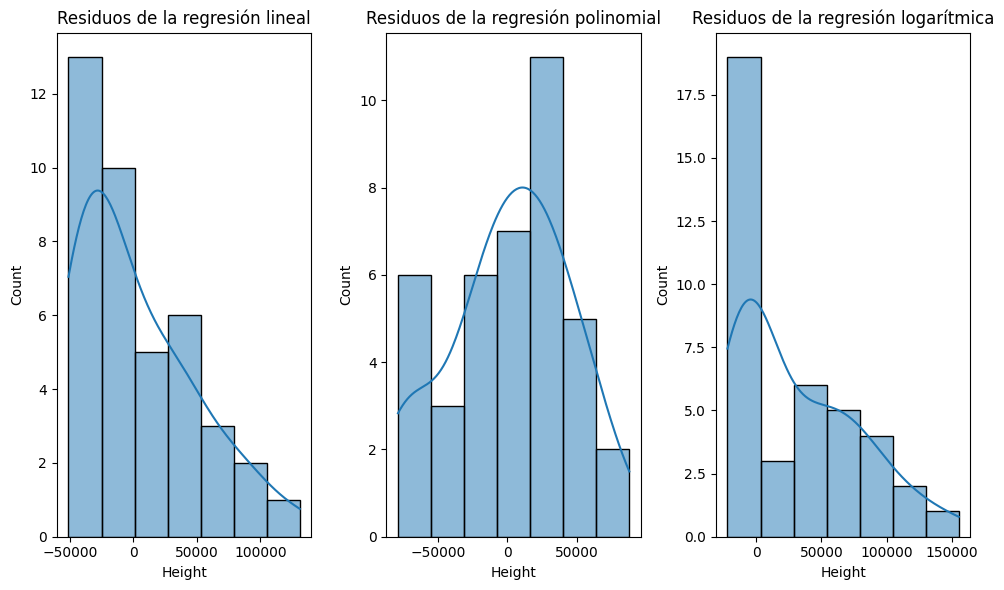

In [56]:
# Calculamos los residuos
lin_residuals = y_test - lin_pred
poly_residuals = y_test - poly_pred
log_residuals = y_test - log_pred

# Graficamos los histogramas
plt.figure(figsize=(10,6))

plt.subplot(1, 3, 1)
sns.histplot(lin_residuals, kde=True)
plt.title('Residuos de la regresión lineal')

plt.subplot(1, 3, 2)
sns.histplot(poly_residuals, kde=True)
plt.title('Residuos de la regresión polinomial')

plt.subplot(1, 3, 3)
sns.histplot(log_residuals, kde=True)
plt.title('Residuos de la regresión logarítmica')

plt.tight_layout()
plt.show()